In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

# Main setup
import imagej
ij = imagej.init(['io.github.mianalysis:mia-plugin:2.0.0-SNAPSHOT'])

[INFO] Overriding MIA; identifier: command:io.github.mianalysis.mia.MIA_; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-plugin-2.0.0-SNAPSHOT.jar
[INFO] Overriding MIA (headless); identifier: command:io.github.mianalysis.mia.MIAHeadless; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-core-2.0.0-SNAPSHOT.jar


In [2]:
from jpype import JClass
from scyjava import jimport
from src.objects.units import Units, MICROMETRE
from src.utilities.imagerenderer import NotebookImageRenderer
from src.utilities.store import Store
from src.wrappers.coordinatesetwrapper import CoordinateSetFactoryWrapper
from src.wrappers.imagewrapper import ImageWrapper, ImageFactoryWrapper
from src.wrappers.measurementwrapper import MeasurementFactoryWrapper
from src.wrappers.metadatawrapper import MetadataWrapper
from src.wrappers.objwrapper import ObjFactoryWrapper
from src.wrappers.objswrapper import ObjsFactoryWrapper
from src.wrappers.volumewrapper import VolumeFactoryWrapper
from src.wrappers.workspacewrapper import WorkspaceWrapper

from src.modules.demomodule import ModuleDemo

import time

Store.ij = ij
Units.spatial_units = MICROMETRE

# Setting renderer
ImageI = jimport('io.github.mianalysis.mia.object.image.ImageI')
ImageI.setGlobalRenderer(NotebookImageRenderer())
ImageI.setUseGlobalImageRenderer(True)

# Setting image factory
ImageFactories = jimport('io.github.mianalysis.mia.object.image.ImageFactories')
image_factory = ImageFactoryWrapper()
ImageFactories.addFactory(image_factory)
ImageFactories.setDefaultFactory(image_factory)

# Setting objects factory (both obj and objs factories must be enabled together)
ObjsFactories = jimport('io.github.mianalysis.mia.object.ObjsFactories')
objs_factory = ObjsFactoryWrapper()
ObjsFactories.addFactory(objs_factory)
ObjsFactories.setDefaultFactory(objs_factory)

# Setting object factory (both obj and objs factories must be enabled together)
ObjFactories = jimport('io.github.mianalysis.mia.object.coordinates.ObjFactories')
obj_factory = ObjFactoryWrapper()
ObjFactories.addFactory(obj_factory)
ObjFactories.setDefaultFactory(obj_factory)

# Setting volume factory
VolumeFactories = jimport('io.github.mianalysis.mia.object.coordinates.volume.VolumeFactories')
volume_factory = VolumeFactoryWrapper()
VolumeFactories.addFactory(volume_factory)
VolumeFactories.setDefaultFactory(volume_factory)

# Setting coordinateset factory
CoordinateSetFactories = jimport('io.github.mianalysis.mia.object.coordinates.volume.CoordinateSetFactories')
coordinate_set_factory = CoordinateSetFactoryWrapper()
CoordinateSetFactories.addFactory(coordinate_set_factory)
CoordinateSetFactories.setDefaultFactory(coordinate_set_factory)

# Setting measurement factory
MeasurementFactories = jimport('io.github.mianalysis.mia.object.measurements.MeasurementFactories')
measurement_factory = MeasurementFactoryWrapper()
MeasurementFactories.addFactory(measurement_factory)
MeasurementFactories.setDefaultFactory(measurement_factory)

# Module imports
ImageLoader = jimport('io.github.mianalysis.mia.module.inputoutput.ImageLoader')
FilterImage = jimport('io.github.mianalysis.mia.module.images.process.FilterImage')
ThresholdImage = jimport('io.github.mianalysis.mia.module.images.process.threshold.GlobalAutoThreshold')
IdentifyObjects = jimport('io.github.mianalysis.mia.module.objects.detect.IdentifyObjects')
ProjectObjects = jimport('io.github.mianalysis.mia.module.objects.transform.ProjectObjects')
ShowImage = jimport('io.github.mianalysis.mia.module.visualise.ShowImage')
MeasureObjectShape = jimport('io.github.mianalysis.mia.module.objects.measure.spatial.MeasureObjectShape')
MeasureObjectCentroid = jimport('io.github.mianalysis.mia.module.objects.measure.spatial.MeasureObjectCentroid')
FilterByMeasurement = jimport('io.github.mianalysis.mia.module.objects.filter.FilterByMeasurement')
ShowObjectMeasurements = jimport('io.github.mianalysis.mia.module.visualise.ShowObjectMeasurements')
ExtractObjectEdges = jimport('io.github.mianalysis.mia.module.objects.process.ExtractObjectEdges')
MeasureObjectIntensity = jimport('io.github.mianalysis.mia.module.objects.measure.intensity.MeasureObjectIntensity')

AvailableModules = jimport('io.github.mianalysis.mia.module.AvailableModules')

# # Example of adding modules
# print(AvailableModules.getModuleNames(True).size())
# AvailableModules.addModuleName(ModuleDemo(None))
# print(AvailableModules.getModuleNames(False).size())

# # Example of generic module loading
# module_name = 'io.github.mianalysis.mia.module.inputoutput.ImageLoader'
# module_class = JClass(module_name)
# module = module_class(None) # Will need to provide Modules for normal usage
# print(module.getName())

ImageWrapper: Implement LUT -> Colormap conversion in show.  For now, setting no LUT
+-----------+--------------------+--------------------+--------------------+-----------+--------------------------+--------------------------+-------------------------+----------------------+-------------------+--------------------------+--------------------------+---------------------------+--------------------------+--------------------------+-----------------------+-----------------------+
| OBJECT_ID |  X_CENTROID (PX)   |  Y_CENTROID (PX)   | Z_CENTROID (SLICE) | TIMEPOINT | SHAPE // BASE_AREA_(PX²) | SHAPE // BASE_AREA_(µm²) | SHAPE // HEIGHT_(SLICE) | SHAPE // HEIGHT_(µm) | SHAPE // N_VOXELS | SHAPE // PROJ_AREA_(PX²) | SHAPE // PROJ_AREA_(µm²) | SHAPE // PROJ_CIRCULARITY | SHAPE // PROJ_PERIM_(PX) | SHAPE // PROJ_PERIM_(µm) | SHAPE // VOLUME_(PX³) | SHAPE // VOLUME_(µm³) |
+-----------+--------------------+--------------------+--------------------+-----------+--------------------------+--------

<java object 'io.github.mianalysis.mia.object.system.Status'>

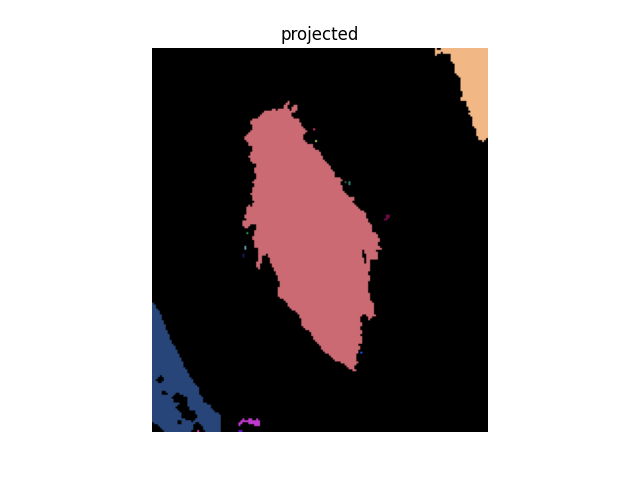

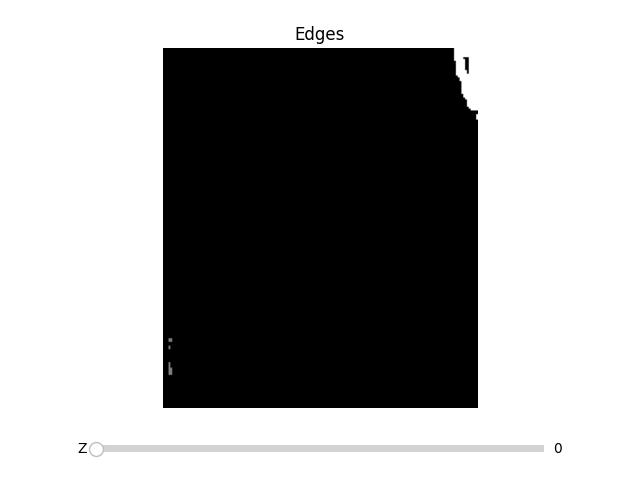

In [8]:
# input_path = "/Users/sc13967/Documents/Programming/Python/mia-python/Ex3_Skeletonisation.tif"
input_path = "/Users/sc13967/Documents/Programming/Python/mia-python/mitosis.tif"
series_number = 1
raw_image_name = "demo"
binary_image_name = "binary"
objects_name = "DNA"
projected_objects_name = "projected"
edge_objects_name = "Edges"
interior_objects_name = "Interior"

workspace = WorkspaceWrapper(1, input_path, series_number, None)

imageLoader = ImageLoader(None)
imageLoader.updateParameterValue(ImageLoader.OUTPUT_IMAGE, raw_image_name)
# imageLoader.updateParameterValue(ImageLoader.SET_SPATIAL_CAL, True)
# imageLoader.updateParameterValue(ImageLoader.XY_CAL, 0.23)
# imageLoader.updateParameterValue(ImageLoader.Z_CAL, 1)
# imageLoader.updateParameterValue(ImageLoader.CROP_MODE, ImageLoader.CropModes.FIXED)
# imageLoader.updateParameterValue(ImageLoader.LEFT, 0)
# imageLoader.updateParameterValue(ImageLoader.TOP, 0)
# imageLoader.updateParameterValue(ImageLoader.WIDTH, 400)
# imageLoader.updateParameterValue(ImageLoader.HEIGHT, 400)
imageLoader.updateParameterValue(ImageLoader.CHANNELS, "2")
imageLoader.updateParameterValue(ImageLoader.FRAMES, "1")
imageLoader.setShowOutput(False)
imageLoader.process(workspace)

filterImage = FilterImage(None)
filterImage.updateParameterValue(FilterImage.INPUT_IMAGE, raw_image_name)
filterImage.updateParameterValue(FilterImage.FILTER_MODE, FilterImage.FilterModes.GAUSSIAN2D)
filterImage.updateParameterValue(FilterImage.FILTER_RADIUS, 1)
filterImage.setShowOutput(False)
filterImage.process(workspace)

thresholdImage = ThresholdImage(None)
thresholdImage.updateParameterValue(ThresholdImage.INPUT_IMAGE, raw_image_name)
thresholdImage.updateParameterValue(ThresholdImage.APPLY_TO_INPUT, False)
thresholdImage.updateParameterValue(ThresholdImage.OUTPUT_IMAGE, binary_image_name)
thresholdImage.setShowOutput(False)
thresholdImage.process(workspace)

identifyObjects = IdentifyObjects(None)
identifyObjects.updateParameterValue(IdentifyObjects.INPUT_IMAGE, binary_image_name)
identifyObjects.updateParameterValue(IdentifyObjects.OUTPUT_OBJECTS, objects_name)
identifyObjects.updateParameterValue(IdentifyObjects.SINGLE_OBJECT, False)
identifyObjects.updateParameterValue(IdentifyObjects.ENABLE_MULTITHREADING, False)
identifyObjects.setShowOutput(False)    
identifyObjects.process(workspace)

projectObjects = ProjectObjects(None)
projectObjects.updateParameterValue(ProjectObjects.INPUT_OBJECTS, objects_name)
projectObjects.updateParameterValue(ProjectObjects.OUTPUT_OBJECTS, projected_objects_name)
projectObjects.setShowOutput(True)
projectObjects.process(workspace)

measureObjectShape = MeasureObjectShape(None)
measureObjectShape.updateParameterValue(MeasureObjectShape.INPUT_OBJECTS, objects_name)
measureObjectShape.updateParameterValue(MeasureObjectShape.MEASURE_PROJECTED_AREA, True)
measureObjectShape.updateParameterValue(MeasureObjectShape.MEASURE_VOLUME, True)
measureObjectShape.updateParameterValue(MeasureObjectShape.MEASURE_PROJECTED_DIA, False)
measureObjectShape.updateParameterValue(MeasureObjectShape.MEASURE_PROJECTED_PERIM, True)
measureObjectShape.updateParameterValue(MeasureObjectShape.ENABLE_MULTITHREADING, False)
measureObjectShape.setShowOutput(True)
measureObjectShape.process(workspace)

measureObjectCentroid = MeasureObjectCentroid(None)
measureObjectCentroid.updateParameterValue(MeasureObjectCentroid.INPUT_OBJECTS, objects_name)
measureObjectCentroid.setShowOutput(False)
measureObjectCentroid.process(workspace)

showObjectMeasurements = ShowObjectMeasurements(None)
showObjectMeasurements.updateParameterValue(ShowObjectMeasurements.INPUT_OBJECTS, objects_name)
showObjectMeasurements.setShowOutput(True)
showObjectMeasurements.process(workspace)

filterByMeasurement = FilterByMeasurement(None)
filterByMeasurement.updateParameterValue(FilterByMeasurement.INPUT_OBJECTS, objects_name)
filterByMeasurement.updateParameterValue(FilterByMeasurement.FILTER_MODE, FilterByMeasurement.FilterModes.REMOVE_FILTERED)
filterByMeasurement.updateParameterValue(FilterByMeasurement.FILTER_METHOD, FilterByMeasurement.FilterMethods.LESS_THAN)
filterByMeasurement.updateParameterValue(FilterByMeasurement.REFERENCE_MODE, FilterByMeasurement.ReferenceModes.FIXED_VALUE)
filterByMeasurement.updateParameterValue(FilterByMeasurement.MEASUREMENT, "SHAPE // N_VOXELS")
filterByMeasurement.updateParameterValue(FilterByMeasurement.REFERENCE_VALUE, "500")
filterByMeasurement.updateParameterValue(FilterByMeasurement.STORE_INDIVIDUAL_RESULTS, True)
filterByMeasurement.setShowOutput(False)
filterByMeasurement.process(workspace)

extractObjectEdges = ExtractObjectEdges(None)
extractObjectEdges.updateParameterValue(ExtractObjectEdges.INPUT_OBJECTS, objects_name)
extractObjectEdges.updateParameterValue(ExtractObjectEdges.CREATE_EDGE_OBJECTS, True)
extractObjectEdges.updateParameterValue(ExtractObjectEdges.OUTPUT_EDGE_OBJECTS, edge_objects_name)
extractObjectEdges.updateParameterValue(ExtractObjectEdges.CREATE_INTERIOR_OBJECTS, False)
extractObjectEdges.updateParameterValue(ExtractObjectEdges.OUTPUT_INTERIOR_OBJECTS, interior_objects_name)
extractObjectEdges.updateParameterValue(ExtractObjectEdges.EDGE_DISTANCE, 4)
extractObjectEdges.setShowOutput(True)
extractObjectEdges.process(workspace)  

measureObjectIntensity = MeasureObjectIntensity(None)
measureObjectIntensity.updateParameterValue(MeasureObjectIntensity.INPUT_OBJECTS, objects_name)
measureObjectIntensity.updateParameterValue(MeasureObjectIntensity.INPUT_IMAGE, raw_image_name)
measureObjectIntensity.updateParameterValue(MeasureObjectIntensity.MEASURE_MEDIAN, False)
measureObjectIntensity.setShowOutput(False)
measureObjectIntensity.process(workspace)  


In [ ]:


# import cProfile
# import pstats

# t1 = time.time_ns()
# with cProfile.Profile() as pr:
Exception = jimport('java.lang.Exception')
try:
    measureObjectIntensity.process(workspace) 
except Exception as ex: # type: ignore
    print("Exception:")
    ex.printStackTrace()
# t2 = time.time_ns()
# print(f'{(t2-t1)/1E9}s')

# stats = pstats.Stats(pr)
# stats.sort_stats(pstats.SortKey.TIME).print_stats(15)


+-----------+--------------------+--------------------+--------------------+-----------+-----------------------+------------------------+-----------------------+-------------------------+-----------------------+
| OBJECT_ID |  X_CENTROID (PX)   |  Y_CENTROID (PX)   | Z_CENTROID (SLICE) | TIMEPOINT | INTENSITY // demo_MAX | INTENSITY // demo_MEAN | INTENSITY // demo_MIN | INTENSITY // demo_STDEV | INTENSITY // demo_SUM |
+-----------+--------------------+--------------------+--------------------+-----------+-----------------------+------------------------+-----------------------+-------------------------+-----------------------+
|     2     | 65.96025582457743  | 26.49474645957058  |        0.0         |     0     |          94.0         |   41.207172224760185   |          32.0         |     9.64580751665831    |        180405.0       |
|     4     | 134.65574048913044 | 251.58095561594203 |        0.0         |     0     |          82.0         |   39.794553894927546   |          32.0 

In [8]:
from typing import List
from src.wrappers.coordinatesetwrapper import CoordinateSetWrapper, CoordinateSetFactoryWrapper
from src.wrappers.imagewrapper import ImageWrapper
from src.wrappers.measurementwrapper import MeasurementWrapper
from src.wrappers.objswrapper import ObjsWrapper, wrapObjs
from src.wrappers.objwrapper import ObjWrapper, ObjFactoryWrapper, wrapObj

from src.objects.coordinateset import CoordinateSet
from src.objects.measurement import  Measurement
from src.objects.obj import  Obj
from src.objects.objs import  Objs
from src.types.types import Points

import numpy as np

osw: ObjsWrapper = workspace.getObjects(objects_name)
o: Obj = osw.getPythonObjs().values()[0]
points: Points = o.getCoordinateSet().getPoints()
points = points[0:5,:]
points[2,1] = 171
pp = np.unique(points[:,0:2], axis=0)

array([[  3, 158,   0],
       [  3, 159,   0],
       [  3, 163,   0],
       [  3, 171,   0]])

In [51]:
points

array([  3, 158,   0,   3, 158,   0,   3, 159,   0,   3, 162,   0,   3,
       163,   0,   3, 171,   0])